In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
fraud = pd.read_csv(r"C:\Users\svire\Downloads\Fraud_check.csv")

In [29]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [30]:
fraud1=fraud.copy()
fraud1['taxable_category'] = pd.cut(x = fraud1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
fraud1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban taxable_category  
0   YES             Good  
1   YES             Good  
2   YES             Good  
3   YES             Good  
4    NO             Good

In [31]:
print(fraud['Undergrad'].value_counts())
print(fraud['Marital.Status'].value_counts())
print(fraud['Urban'].value_counts())

Undergrad
YES    312
NO     288
Name: count, dtype: int64
Marital.Status
Single      217
Married     194
Divorced    189
Name: count, dtype: int64
Urban
YES    302
NO     298
Name: count, dtype: int64


In [32]:
fraud[fraud['Taxable.Income']<=30000].count()

Undergrad          124
Marital.Status     124
Taxable.Income     124
City.Population    124
Work.Experience    124
Urban              124
dtype: int64

In [33]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [34]:
len(fraud['Taxable.Income'].unique())

599

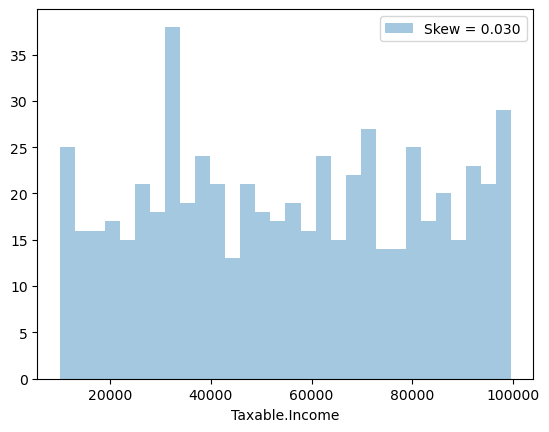

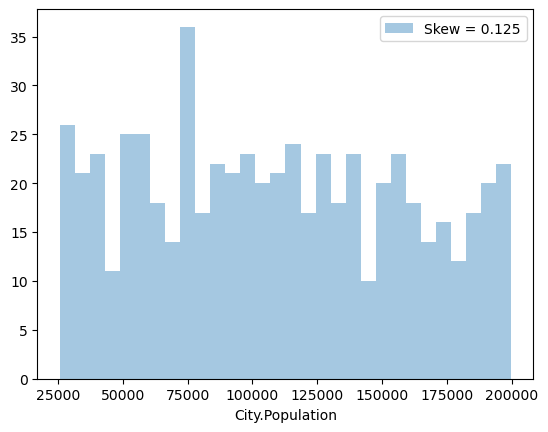

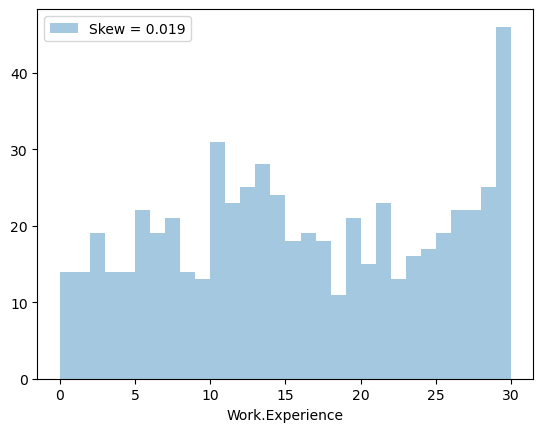

In [35]:
numerical_features=[feature for feature in fraud.columns if fraud[feature].dtypes != 'O']
for feat in numerical_features:
    skew = fraud[feat].skew()
    sns.distplot(fraud[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

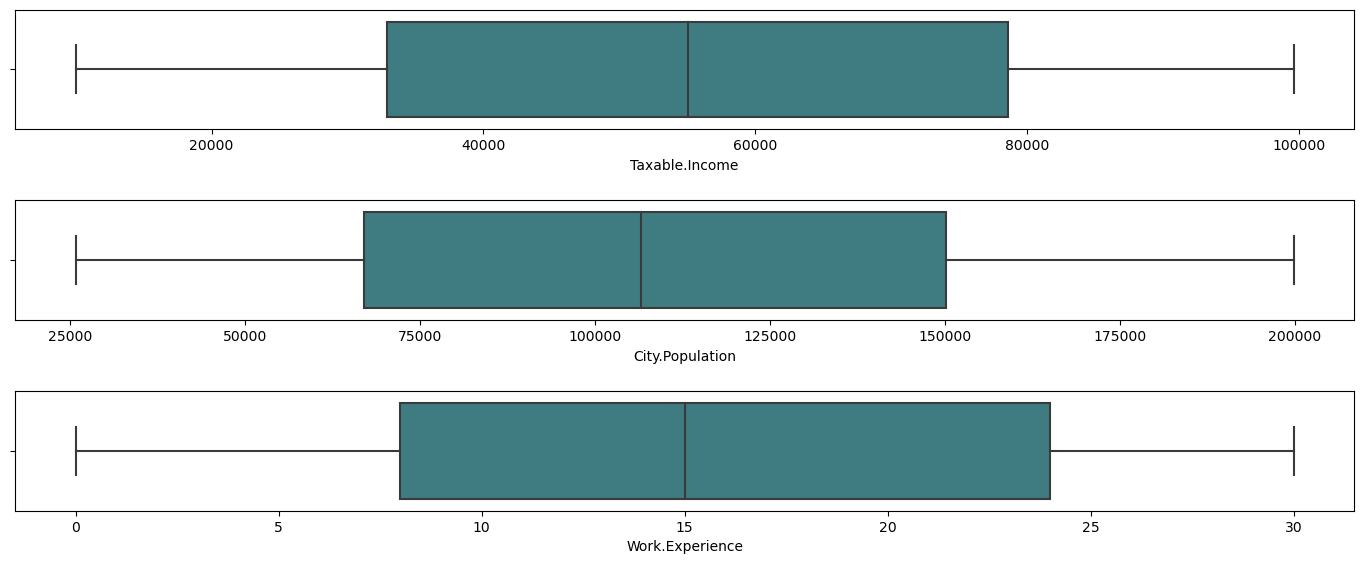

In [36]:
ot=fraud.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Axes: >

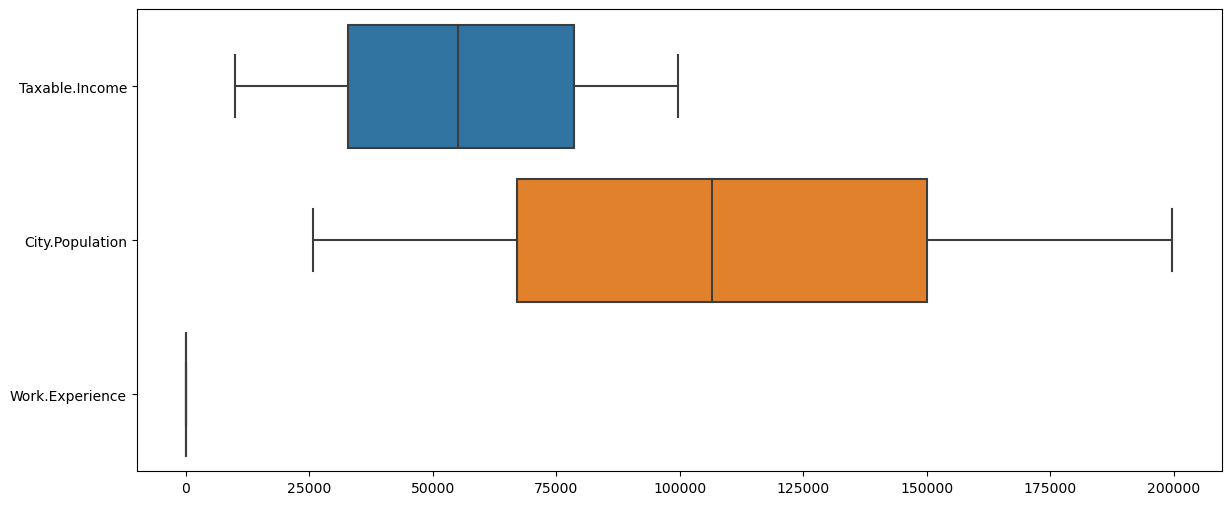

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot(data=fraud[numerical_features], orient="h")

<Figure size 800x800 with 0 Axes>

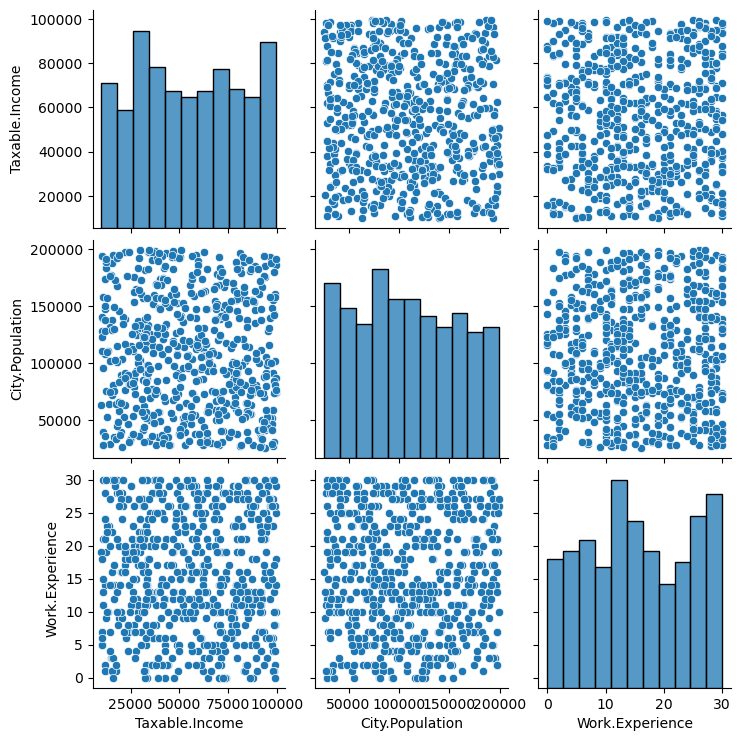

In [38]:
plt.figure(figsize=(8,8))
sns.pairplot(fraud, palette='coolwarm')
plt.show()

In [39]:
plt.figure(figsize = (12,8))
plt.pie(fraud1['taxable_category'].value_counts(),
       labels=fraud1.taxable_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

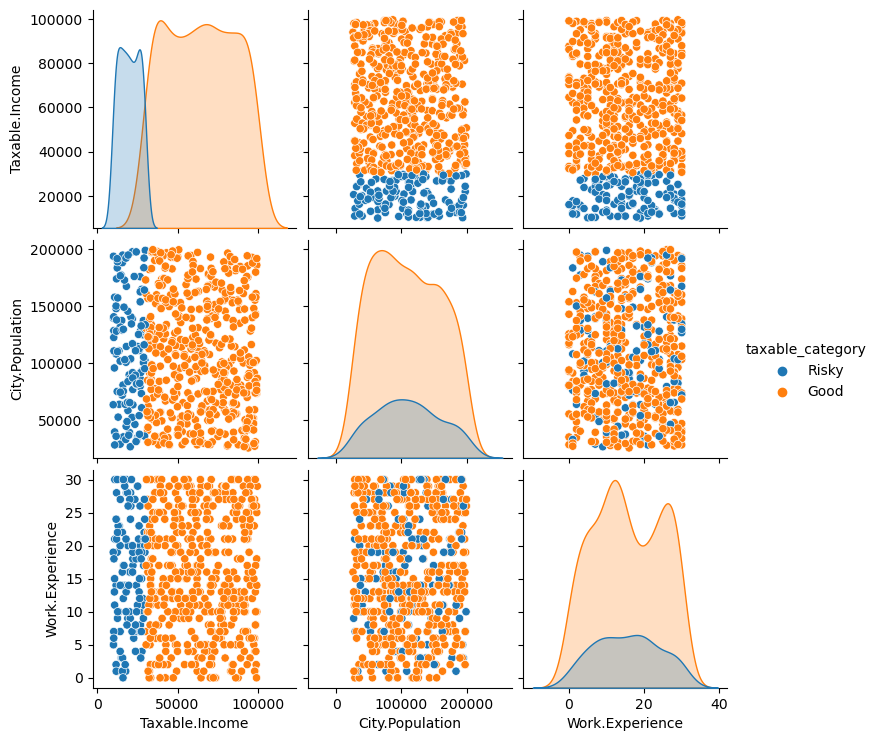

In [40]:
import seaborn as sns
sns.pairplot(data=fraud1, hue = 'taxable_category')

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
fraud['Urban']=le.fit_transform(fraud['Urban'])
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [43]:
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0            0         Single           68833            50047   
1            1       Divorced           33700           134075   
2            0        Married           36925           160205   
3            1         Single           50190           193264   
4            0        Married           81002            27533   
..         ...            ...             ...              ...   
595          1       Divorced           76340            39492   
596          1       Divorced           69967            55369   
597          0       Divorced           47334           154058   
598          1        Married           98592           180083   
599          0       Divorced           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [44]:
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [45]:
fraud.loc[fraud['Taxable.Income']<=30000, 'Taxable.Income']=0
fraud

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [46]:
fraud.loc[fraud['Taxable.Income']>30000,'Taxable.Income']=1
fraud

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2               1            50047   
1            1               0               1           134075   
2            0               1               1           160205   
3            1               2               1           193264   
4            0               1               1            27533   
..         ...             ...             ...              ...   
595          1               0               1            39492   
596          1               0               1            55369   
597          0               0               1           154058   
598          1               1               1           180083   
599          0               0               1           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [47]:
X = fraud.iloc[:,[0,1,3,4,5]]
X

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]

In [48]:
y=fraud.iloc[:,2]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [53]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [54]:
yhat_train = model.predict(X_train)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22        98
           1       0.82      1.00      0.90       382

    accuracy                           0.82       480
   macro avg       0.91      0.56      0.56       480
weighted avg       0.85      0.82      0.76       480



In [57]:
yhat_test = model.predict(X_test)

In [58]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.94      0.85        94

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



In [59]:
model.score(X_train,y_train)

0.8208333333333333

In [60]:
from sklearn import tree

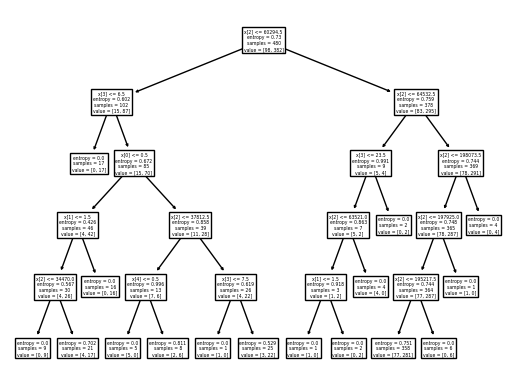

<Figure size 9600x7200 with 0 Axes>

In [61]:
tree.plot_tree(model)
plt.figure(dpi=1500)
plt.show()

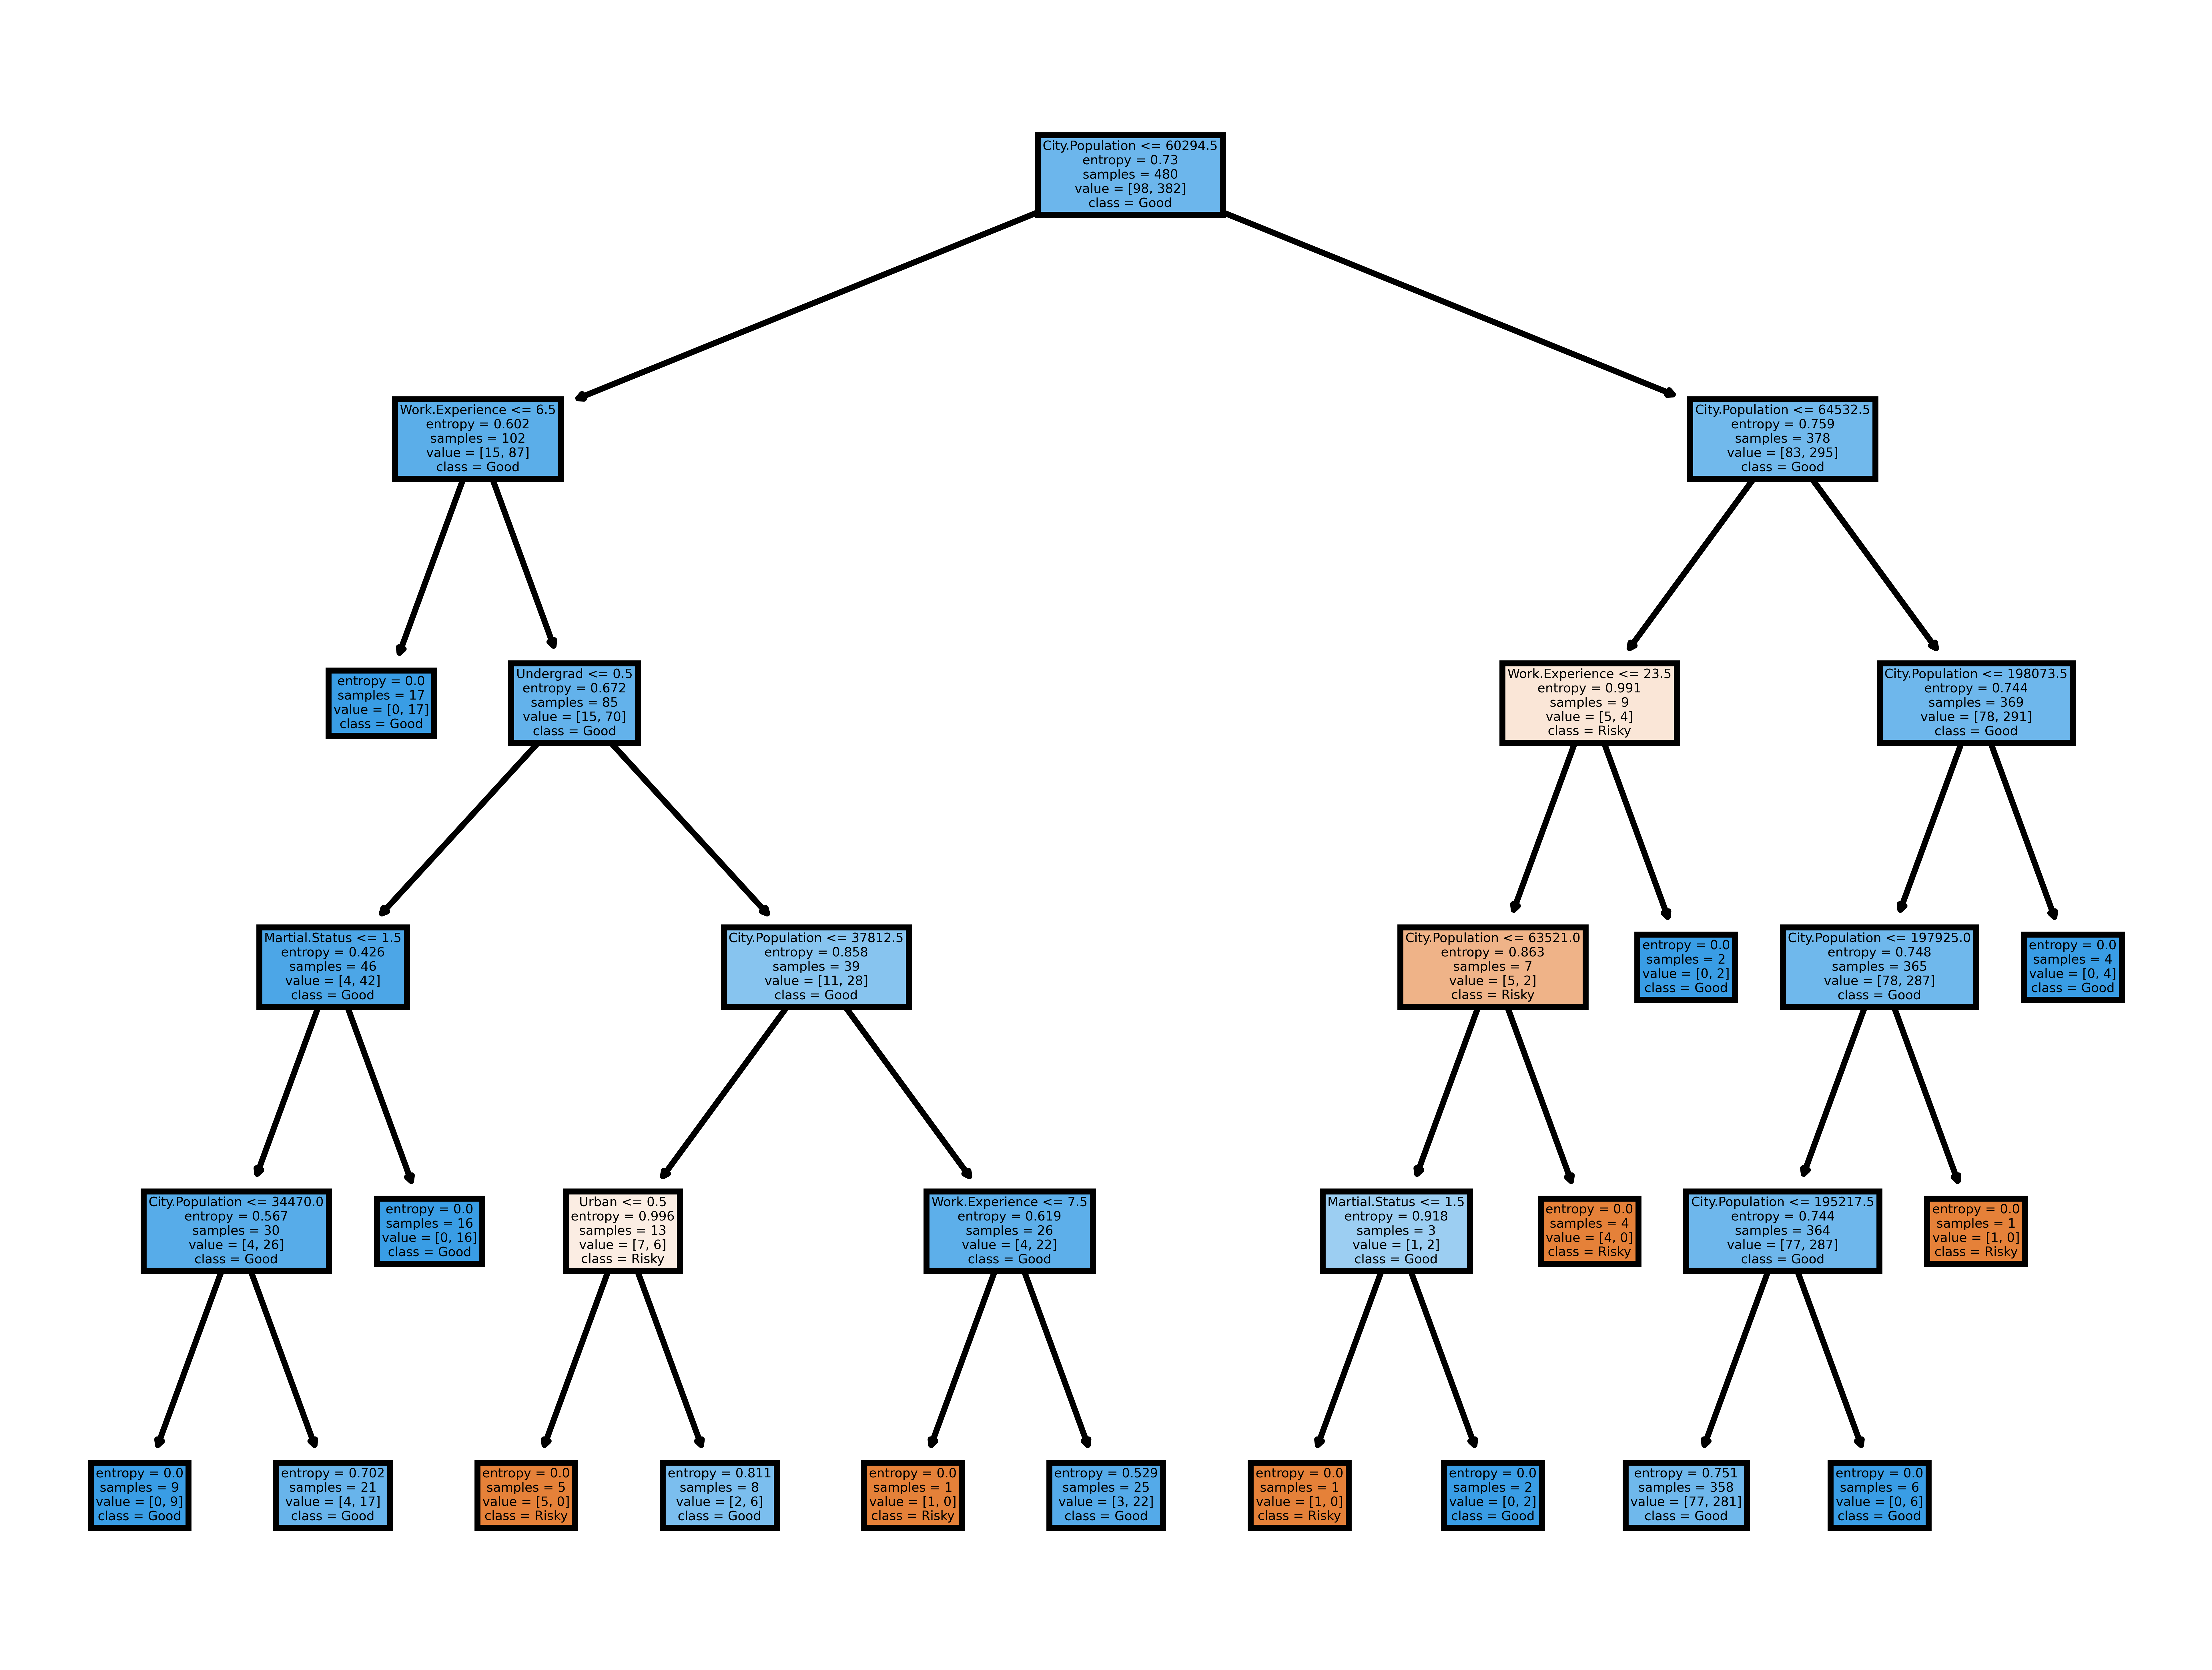

In [62]:
fn=['Undergrad',"Martial.Status","City.Population","Work.Experience","Urban"]
cn=['Risky',"Good"]
plt.figure(dpi=1500)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);